## SALARY CLASSIFICATION PREDICTION USING SEVERAL MACHINE LEARNING MODELS

## ABSTRACT

In today's data-driven world, predicting an individual's salary classification has become an important task in many industries such as banking, finance, and marketing. By

analysing various factors that affect salary, such as education level, years of experience, job title, and industry, companies can gain valuable insights into the economic 

status of their customers and target their products and services more effectively. Machine learning models have emerged as a powerful tool for predicting salary 

classification, with the potential to achieve high accuracy rates and improve business decision-making. This study explores the use of several machine learning models for 

salary classification prediction, with a focus on comparing their performance and identifying the most important features.

### Dataset Information

1. age - Age of Persons

2. workclass - Describe work type

3. fnlwgt - Financial Weight

4. education - Person's education level

5. martial status - Person's marital status

6. occupation - Person's usual or principal work or business

7. sex - Gender of Person

8. race - Person's race

9. capital gain - Person's capital gain

10. capital loss - Person's capital loss

11. hours per week - Number of hours put in a week

12. native country - Persons native country

13. relationship - Person's relationship status

14. education-num - Person's education level

15. salary - Whether <50k or not



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import style
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import shap
import lime.lime_tabular
from sklearn import model_selection
from yellowbrick.model_selection import CVScores

- Read and view first 5 columns of the dataset

## EXPLORATORY DATA ANALYSIS

In [4]:
df = pd.read_csv('adult.csv', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                                     'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary' ])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- Lets get information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- Check for duplicated values

In [6]:
df.duplicated().sum()

24

- Drop duplicated values

In [7]:
df.drop_duplicates(inplace=True)  # Drop duplicates 

In [8]:
df.duplicated().sum()

0

- Describe the dataset

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


- The shape of our dataset. How many rows and columns

In [10]:
df.shape

(32537, 15)

- Check for all the unique values in a column

In [11]:
cols = []
for col in df:
    print(df[col].unique())


[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Pr

- Check for null values

In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [13]:
print(df[df.eq(" ?").any(axis=1)])

       age workclass  fnlwgt      education  education-num  \
14      40   Private  121772      Assoc-voc             11   
27      54         ?  180211   Some-college             10   
38      31   Private   84154   Some-college             10   
51      18   Private  226956        HS-grad              9   
61      32         ?  293936        7th-8th              4   
...    ...       ...     ...            ...            ...   
32530   35         ?  320084      Bachelors             13   
32531   30         ?   33811      Bachelors             13   
32539   71         ?  287372      Doctorate             16   
32541   41         ?  202822        HS-grad              9   
32542   72         ?  129912        HS-grad              9   

               marital-status      occupation    relationship  \
14         Married-civ-spouse    Craft-repair         Husband   
27         Married-civ-spouse               ?         Husband   
38         Married-civ-spouse           Sales         Husban

### Observation

- While this does not give indications that there are missing values, missing values were spotted to have question marks instead of being left blank and this needs to be dealt with.

In [14]:
df = df.loc[(df['workclass'] != ' ?') & (df['native-country'] != ' ?') & (df['occupation'] != ' ?') ]
print(df['workclass'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']


In [15]:
df.nunique()

age                  72
workclass             7
fnlwgt            20263
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        118
capital-loss         90
hours-per-week       94
native-country       41
salary                2
dtype: int64

### Insights about our dataset from the first glance

- In our dataset, we have both numerical and categorical variables.

- It is essential to see whether columns are correctly inferred.

- The most important one to look for is our target variable 'salary'

- 'salary' is detected as an object, not as an integer.

- We have 8 categorical variables, which we have to encode as numerical.

### What Problems do we have?

1. We have a binary classification problem

2. We make prediction on the target variable 'salary' 

3. We will build a model to get best prediction on the salary variable.

In [16]:
# Identify Numeric features
numerical_labels = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','salary']

# Identify Categorical features
categorical_labels = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [17]:
# Reformat the salary column
df['salary'] = df['salary'].map({' <=50K': 0, ' >50K': 1})
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [18]:
print(df['capital-loss'].value_counts())
print(df['capital-gain'].value_counts())
print(df['native-country'].value_counts())

0       28712
1902      194
1977      162
1887      155
1848       50
        ...  
2080        1
4356        1
1539        1
1844        1
1411        1
Name: capital-loss, Length: 90, dtype: int64
0        27601
15024      337
7688       270
7298       240
99999      148
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: capital-gain, Length: 118, dtype: int64
 United-States                 27487
 Mexico                          606
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          6

## Numerical data analysis

### Target variable

- One of the first steps of exploratory data analysis is to look at what the values of y looks like.

In [19]:
print(df['salary'].value_counts())

0    22633
1     7506
Name: salary, dtype: int64


<AxesSubplot: xlabel='salary', ylabel='count'>

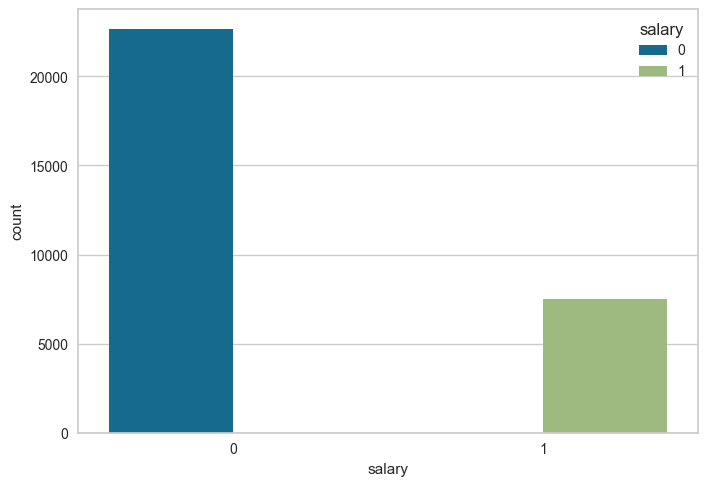

In [20]:
# Visualizing the target column
sns.countplot(data=df, x="salary", hue="salary")

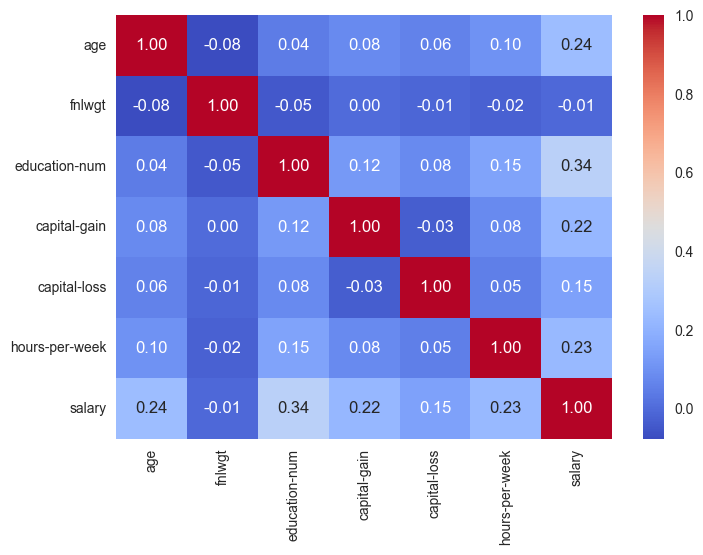

In [21]:
sns.heatmap(df[numerical_labels].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

In [22]:
df.corr()['salary'].sort_values()

fnlwgt           -0.008992
capital-loss      0.150026
capital-gain      0.221204
hours-per-week    0.229435
age               0.242017
education-num     0.335413
salary            1.000000
Name: salary, dtype: float64

## Observation
- Almost 75% (22654) of the instances of our target variable is '<50k'

- 7508 (25%) have a salary above 50k

- We have an imbalanced data.

- No highly correlated column observed

- We can use accuracy, precision, recall and F1-score.

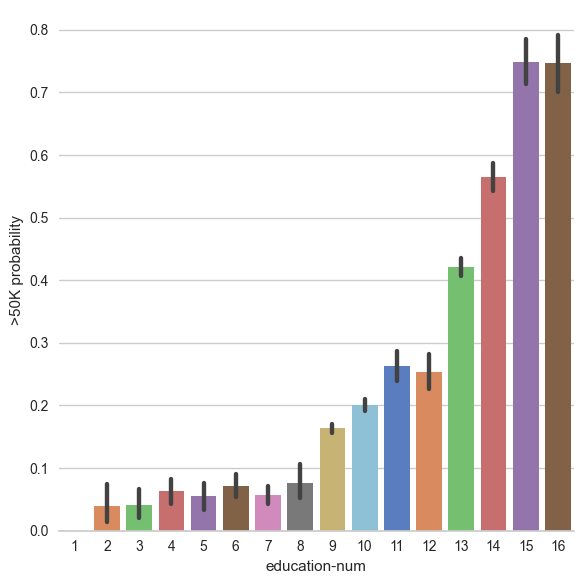

In [23]:
# Explore Education Num vs Salary
g = sns.catplot(data=df, x="education-num", y="salary", kind="bar", height=6,  palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")


## Observation

- The higher your educational level the more chances you have of getting a salary > 50k

In [24]:
df[numerical_labels].skew()

age                0.528971
fnlwgt             1.460055
education-num     -0.302845
capital-gain      11.898104
capital-loss       4.524409
hours-per-week     0.332386
salary             1.160644
dtype: float64

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'fnlwgt'}>,
        <AxesSubplot: title={'center': 'education-num'}>],
       [<AxesSubplot: title={'center': 'capital-gain'}>,
        <AxesSubplot: title={'center': 'capital-loss'}>,
        <AxesSubplot: title={'center': 'hours-per-week'}>],
       [<AxesSubplot: title={'center': 'salary'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

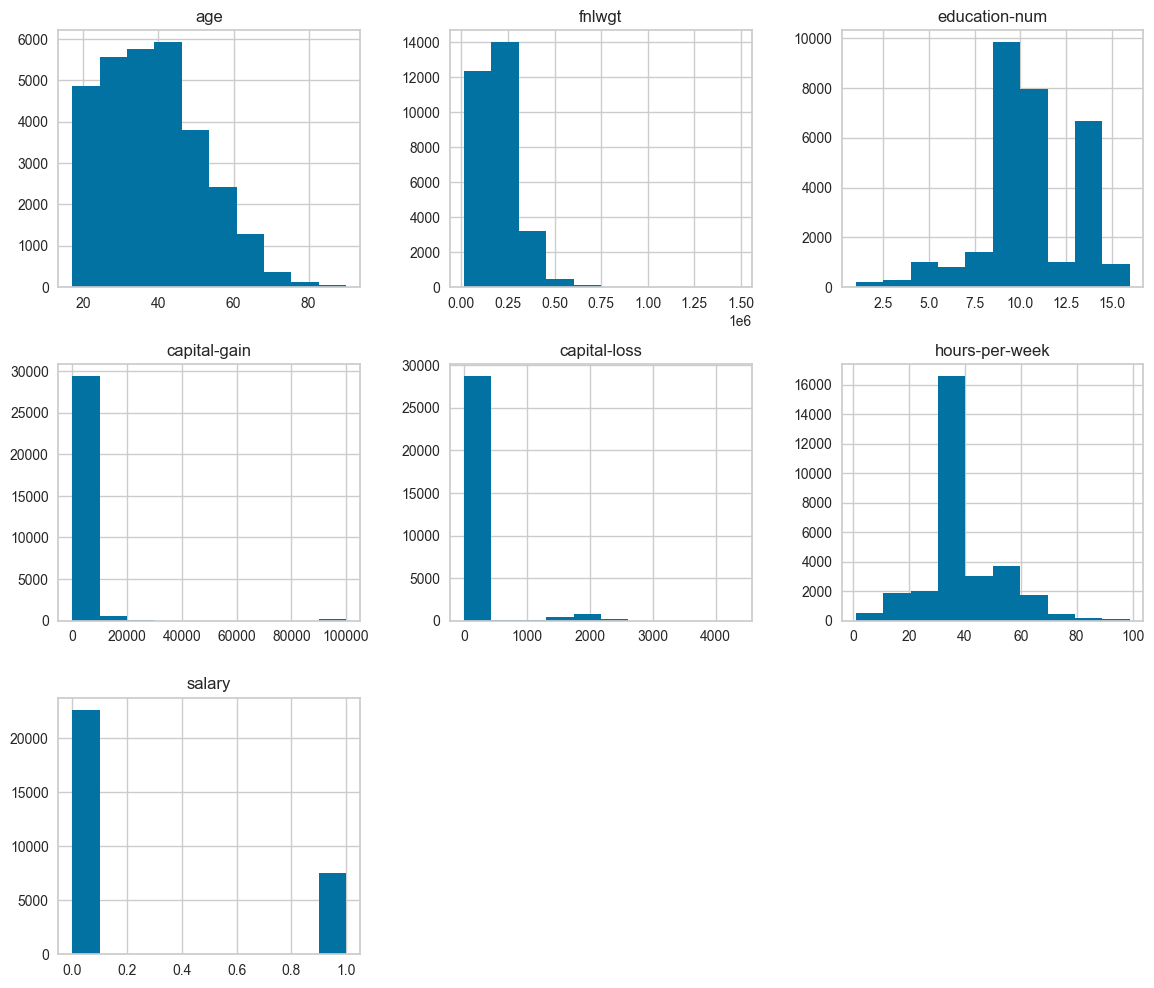

In [25]:
df[numerical_labels].hist(figsize=(14,12))

- Based on the result, education-num has slight right skew, other features have right tail, positively skewed shape distribution.

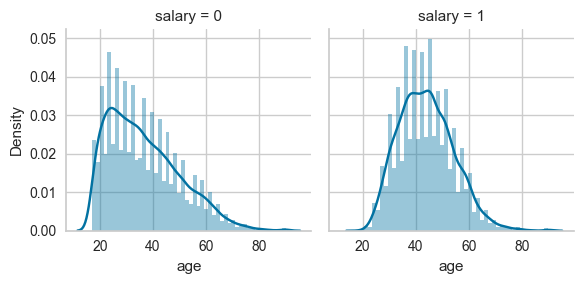

In [26]:
# Explore Age vs Salary
g = sns.FacetGrid(df, col='salary')
g = g.map(sns.distplot, "age")
plt.show()

## Categorical data analysis

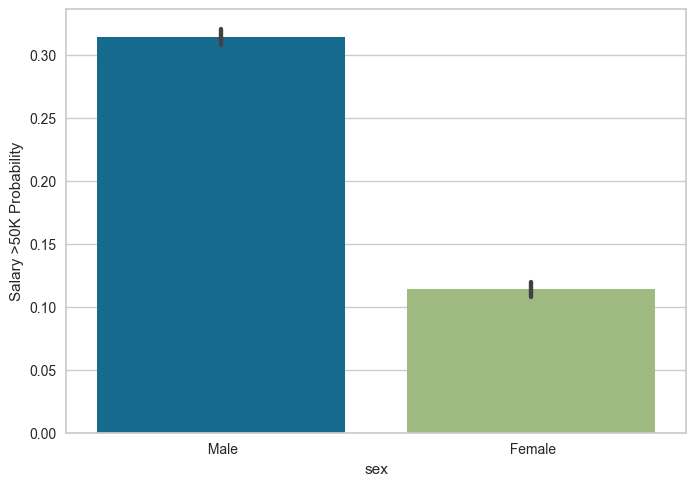

In [27]:
# Explore Sex vs Salary
g = sns.barplot(x="sex",y="salary",data=df)
g = g.set_ylabel("Salary >50K Probability")
plt.show()

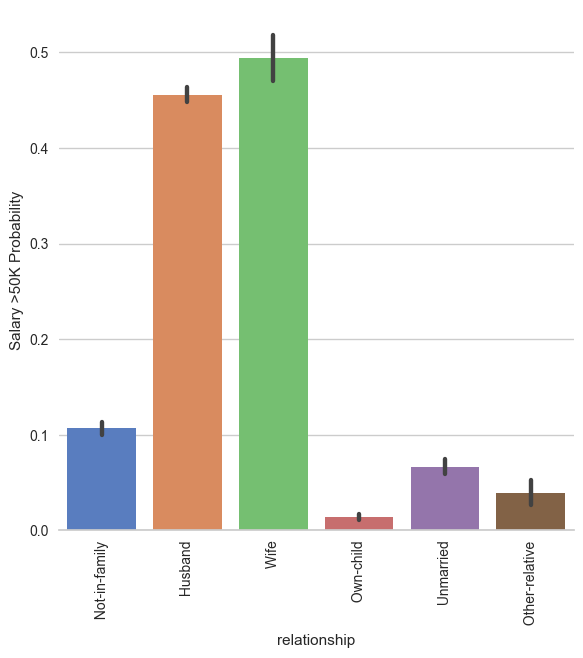

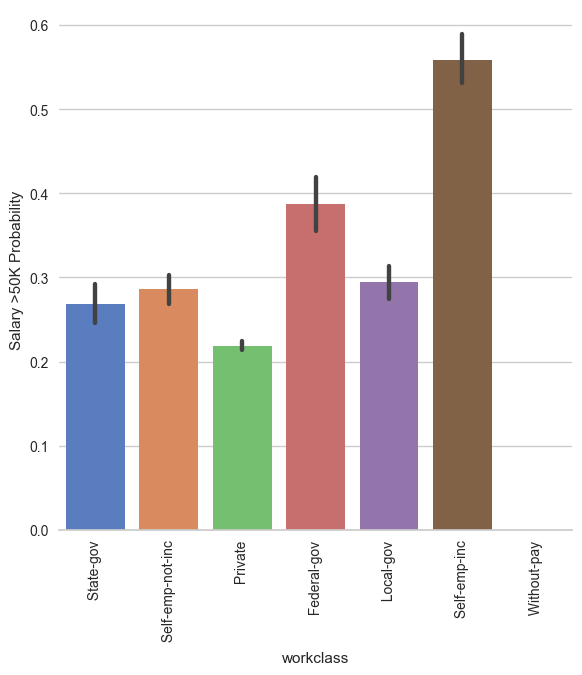

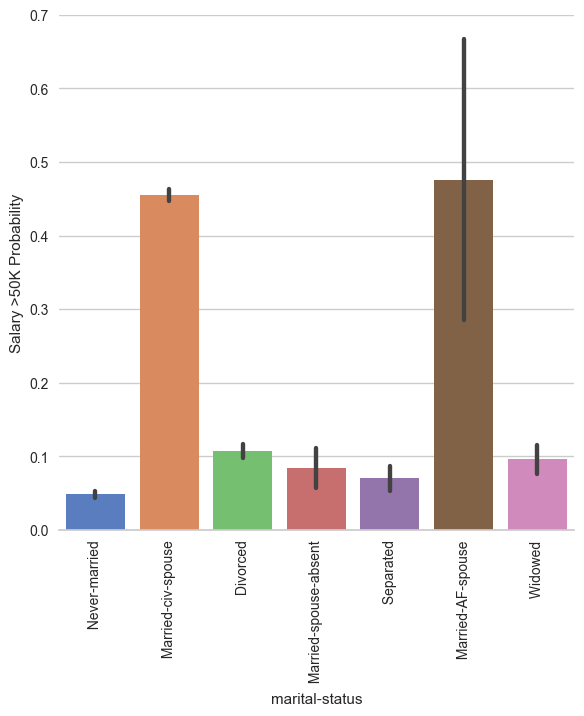

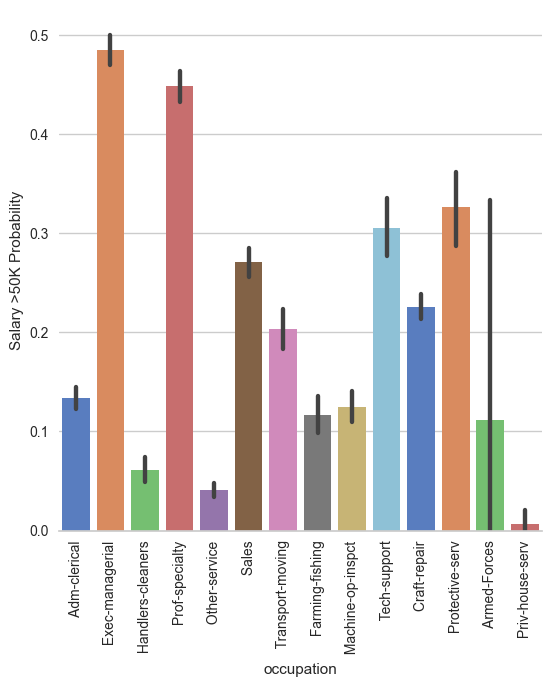

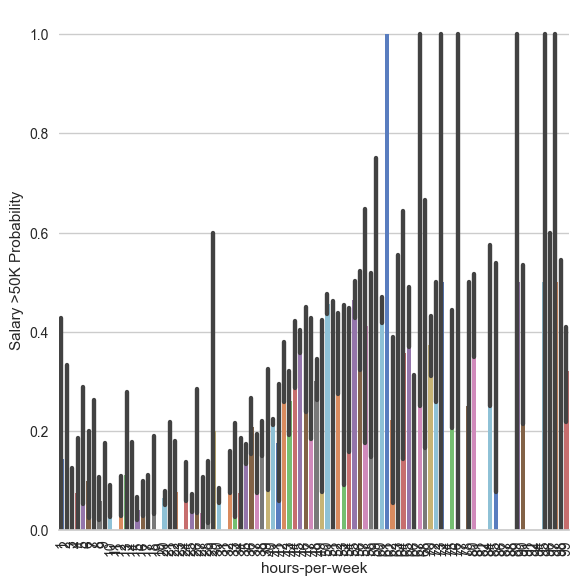

In [28]:
# Explore Relationship vs Salary
cat_columns = ['relationship', 'workclass', 'marital-status', 'occupation', 'hours-per-week']

for cat in cat_columns:
    g = sns.catplot(x=cat,y="salary",data=df,kind="bar", height = 6 ,
    palette = "muted")
    g.despine(left=True)
    g = g.set_ylabels("Salary >50K Probability")
    plt.xticks(rotation=90)
    plt.show()

## Feature Engineering

In [29]:
df['sex'] = df['sex'].map({' Male': 0, ' Female': 1})
df['marital-status'] = df['marital-status'].replace([' Never-married', ' Divorced', ' Widowed', ' Separated'], 'single')
df['marital-status'] = df['marital-status'].replace([' Married-civ-spouse',' Married-spouse-absent', ' Married-AF-spouse'], 'married')
df['marital-status'] = df['marital-status'].map({'single': 0, 'married': 1})
df['marital-status'] = df['marital-status'].astype(int)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0


**Feature Encoding**

In [30]:
d = LabelEncoder()

for col in df[categorical_labels]:
    df[col]= d.fit_transform(df[col])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,5,77516,9,13,0,0,1,4,0,2174,0,40,38,0
1,50,4,83311,9,13,1,3,0,4,0,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,0,0,0,40,38,0
3,53,2,234721,1,7,1,5,0,2,0,0,0,40,38,0
4,28,2,338409,9,13,1,9,5,2,1,0,0,40,4,0


**Scale values**

In [31]:
# Scaling of the dataset is often necessary for logistic regression because this algorithm is sensitive to the scale of the input features. 
# Scaling is often necessary for KNN model because KNN algorithm relies on the distance metric to find the k nearest neighbors, 
# and features with larger scales can dominate the distance calculation, leading to biased results.
# Scaling is not necessary as in random forest and Decision because they are not distance-based.

scaler = MinMaxScaler()
df[numerical_labels] = scaler.fit_transform(df[numerical_labels])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.301370,5,0.043338,9,0.800000,0,0,1,4,0,0.02174,0.0,0.397959,38,0.0
1,0.452055,4,0.047277,9,0.800000,1,3,0,4,0,0.00000,0.0,0.122449,38,0.0
2,0.287671,2,0.137244,11,0.533333,0,5,1,4,0,0.00000,0.0,0.397959,38,0.0
3,0.493151,2,0.150212,1,0.400000,1,5,0,2,0,0.00000,0.0,0.397959,38,0.0
4,0.150685,2,0.220703,9,0.800000,1,9,5,2,1,0.00000,0.0,0.397959,4,0.0


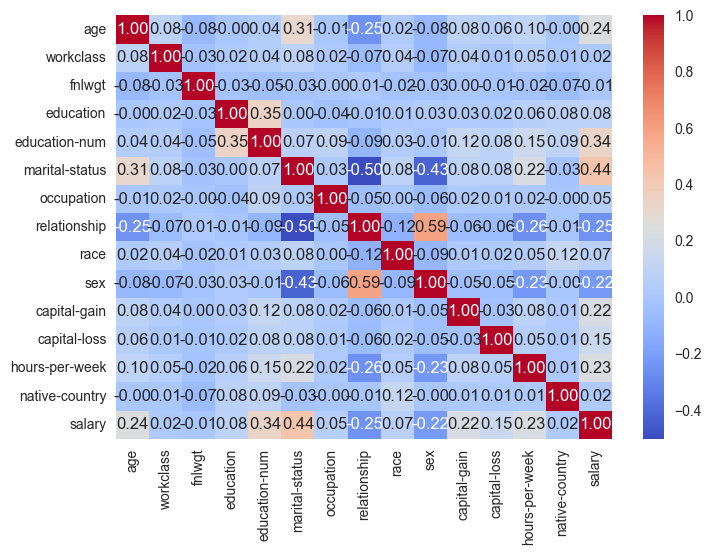

In [32]:
# Plot a correlation heatmap to show relationship between features

sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

In [33]:
df.corr()['salary'].sort_values()

relationship     -0.251026
sex              -0.216668
fnlwgt           -0.008992
workclass         0.018030
native-country    0.023041
occupation        0.051476
race              0.071689
education         0.079039
capital-loss      0.150026
capital-gain      0.221204
hours-per-week    0.229435
age               0.242017
education-num     0.335413
marital-status    0.436044
salary            1.000000
Name: salary, dtype: float64

## Modeling

In [34]:
X = df.drop(['salary', 'workclass', 'relationship', 'race', 'native-country'], axis=1)
y = df['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
#function to train and predict models
def train_pred_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    # scaling the data so that comparatively larger values do not make the model biased
    model = model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    model.score(X_test, y_test)

    print(classification_report(y_test, model_pred))
    return {'model': model, 'model_pred': model_pred}

In [36]:
#function to find the optimal parameters for any model
def find_optimal_params(model, params, X_train=X_train, y_train=y_train):
    grid_search = GridSearchCV(model, params)
    grid_search.fit(X_train, y_train)

    print('Best parameters is',grid_search.best_params_, 'with a mean CV score of:', grid_search.best_score_)

In [37]:
# Generate confusion matrix
def generate_confusion_matrix(y_test, model_pred):
    # confusion matrix
    cm = confusion_matrix(y_test, model_pred)
    TN, FP, FN, TP = cm.ravel()
    print("********************************************************************")
    print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm) 
    disp.plot()
    
    print("********************************************************************")

### Model 1 - Logistic Regression Model

Default parameters

In [38]:
lr = LogisticRegression(random_state=42)
lr_model = train_pred_model(lr)

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      6749
         1.0       0.74      0.54      0.62      2293

    accuracy                           0.84      9042
   macro avg       0.80      0.74      0.76      9042
weighted avg       0.83      0.84      0.83      9042



#### GridSearch - Find Optimal parameter values for LogisticRegression Model (Hyperparameter tunning)

In [39]:
## Tuning the parameters Inverse of regularization strength (C) and Maximum number of iterations (max_iter)
lr_params = {'C': [1.0, 0.1, 10], 'max_iter': [50, 100, 200, 500, 1000]}
    
find_optimal_params(lr, lr_params)

Best parameters is {'C': 10, 'max_iter': 500} with a mean CV score of: 0.8347627017925005


##### Using Optimal Hyperparameter

In [40]:
lr_op = LogisticRegression(random_state=42, C=10, max_iter=500)
lr_op_model = train_pred_model(lr_op)

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      6749
         1.0       0.75      0.55      0.64      2293

    accuracy                           0.84      9042
   macro avg       0.80      0.74      0.77      9042
weighted avg       0.83      0.84      0.83      9042



### Model 2 - KNN Model

Default parameters

In [41]:
knn = KNeighborsClassifier()
knn_model = train_pred_model(knn)

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89      6749
         1.0       0.69      0.56      0.62      2293

    accuracy                           0.82      9042
   macro avg       0.77      0.74      0.75      9042
weighted avg       0.82      0.82      0.82      9042



#### GridSearch - Find Optimal parameter values for KNN Model (Hyperparameter tunning)

In [42]:
## Tuning the parameters Number of neigbours (n_neighbors) and Measure of distance (Manhattan p=1, and Euclidean p=2)
knn_params = {'n_neighbors': [2, 5, 7, 10, 12, 15], 'p': [1, 2]}

find_optimal_params(knn, knn_params)

Best parameters is {'n_neighbors': 10, 'p': 1} with a mean CV score of: 0.8205429960829423


### Using Optimal Hyperparameter

In [43]:
knn_op = KNeighborsClassifier(n_neighbors = 10, p= 1)
knn_op_model = train_pred_model(knn_op)

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      6749
         1.0       0.74      0.50      0.60      2293

    accuracy                           0.83      9042
   macro avg       0.79      0.72      0.74      9042
weighted avg       0.82      0.83      0.82      9042



### Model 3 - Random Forest Model

Default parameters

In [44]:
# It is not necessary to scale because we are creating a lot of decision trees, which means it does not depend on distance-based calculations or the scale of the features.
rf = RandomForestClassifier(random_state=42)
rf_model = train_pred_model(rf)

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      6749
         1.0       0.75      0.62      0.68      2293

    accuracy                           0.85      9042
   macro avg       0.81      0.77      0.79      9042
weighted avg       0.84      0.85      0.84      9042



#### GridSearch - Find Optimal parameter values for Random Forest Model (Hyperparameter tunning)

In [45]:
# Tuning the parameters Maximum depth of the tree (max_depth) and Number of trees in the forest (n_estimators)
rf_params = {'max_depth': [2, 3, 5, 7, 10], 'n_estimators': [100, 300, 500, 1000]} #Takes about 5-10mins to run

find_optimal_params(rf, rf_params)

Best parameters is {'max_depth': 10, 'n_estimators': 1000} with a mean CV score of: 0.8526325952669541


### Using Optimal Hyperparameter

In [46]:
# random state is used to keep the algorithm constant
rf_op = RandomForestClassifier(max_depth=10,n_estimators=1000,random_state=42)
rf_op_model = train_pred_model(rf_op)

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      6749
         1.0       0.82      0.55      0.66      2293

    accuracy                           0.85      9042
   macro avg       0.84      0.75      0.78      9042
weighted avg       0.85      0.85      0.84      9042



## Model 4 - Decision Trees Model

Default parameters

In [47]:
dt = DecisionTreeClassifier()
dt_model = train_pred_model(dt)

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      6749
         1.0       0.62      0.60      0.61      2293

    accuracy                           0.81      9042
   macro avg       0.74      0.74      0.74      9042
weighted avg       0.81      0.81      0.81      9042



#### GridSearch - Find Optimal parameter values (Hyperparameter tunning)

In [48]:
# Tuning the parameters Maximum depth of the tree (max_depth), Minimum samples split (min_samples_split) and maximum number of features (max_features)
dt_params = {'max_depth': [None, 3, 5, 10, 15], 'min_samples_split': [2, 3, 4, 5], 'max_features': [None, 'auto', 'sqrt', 'log2']}

find_optimal_params(dt, dt_params)

Best parameters is {'max_depth': 10, 'max_features': None, 'min_samples_split': 3} with a mean CV score of: 0.8487456428771221


### Using Optimal Hyperparameter

In [49]:
dt_op = DecisionTreeClassifier(max_depth=10, max_features=None, min_samples_split=4)
dt_op_model = train_pred_model(dt_op)

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      6749
         1.0       0.78      0.58      0.66      2293

    accuracy                           0.85      9042
   macro avg       0.82      0.76      0.78      9042
weighted avg       0.85      0.85      0.84      9042



### Generate confusion matrix for experiment 1

********************************************************************
TN=6325, FP=424, FN=1059, TP=1234
********************************************************************
********************************************************************
TN=6349, FP=400, FN=1150, TP=1143
********************************************************************
********************************************************************
TN=6273, FP=476, FN=880, TP=1413
********************************************************************
********************************************************************
TN=6364, FP=385, FN=961, TP=1332
********************************************************************


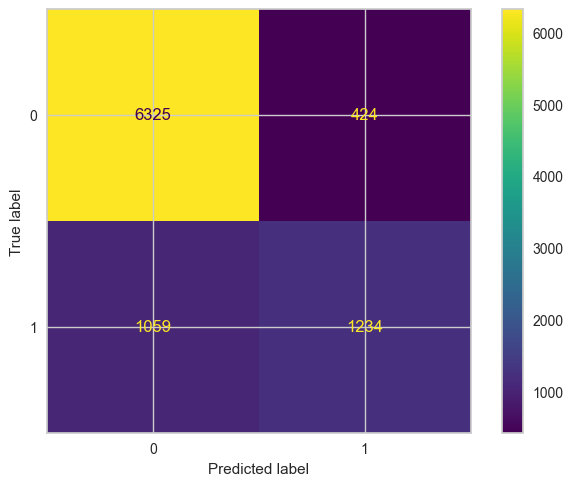

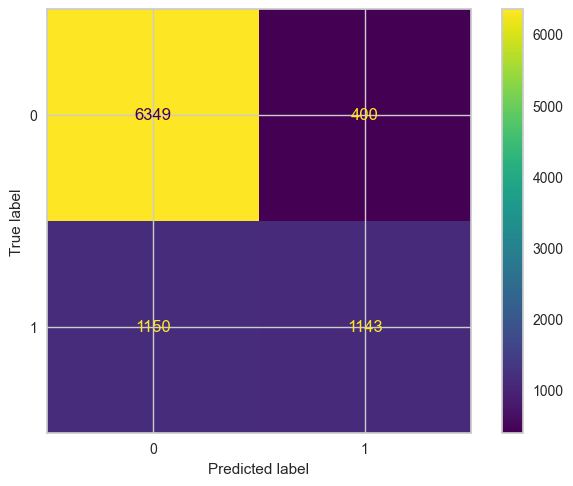

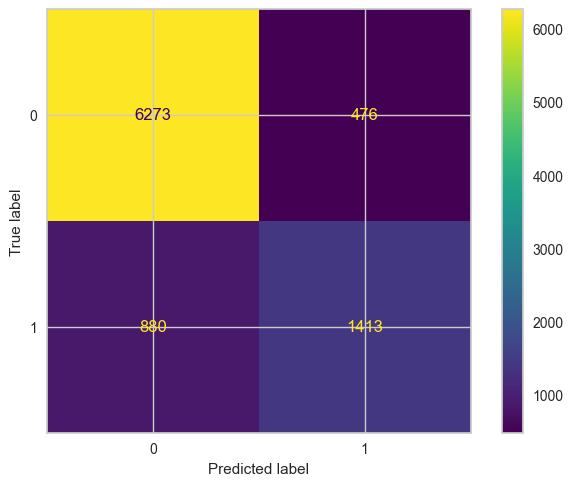

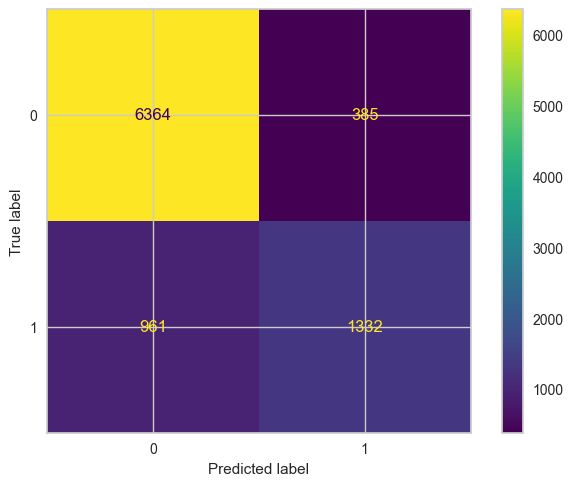

In [50]:
# Logistic Regression
generate_confusion_matrix(y_test, lr_model['model_pred'])

# Knn
generate_confusion_matrix(y_test, knn_op_model['model_pred'])

# Random Forest
generate_confusion_matrix(y_test, rf_model['model_pred'])

# Decision Tree
generate_confusion_matrix(y_test, dt_op_model['model_pred'])

- Observation from the first experiment showed that the models were biased towards class '0' this can be attributed to the imbalance in the dataset. Hence the need to balance the dataset and retrain

## Experiment 2 - Using SMOTE for balancing data
### Resampling dataset

In [51]:
## Resampling data size 
smt =  SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

sampled_X_train, sampled_X_test, sampled_y_train, sampled_y_test = train_test_split(X_train_sm, y_train_sm, test_size=0.30, stratify=y_train_sm, random_state=42)

<AxesSubplot: xlabel='salary', ylabel='count'>

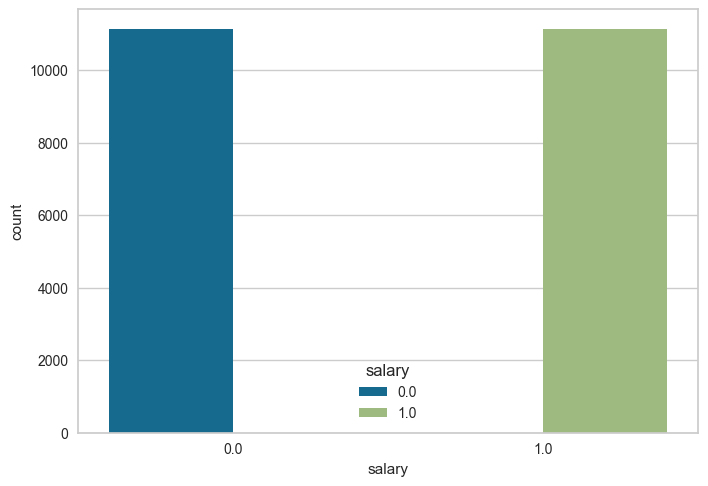

In [52]:
# Visualizing resampled target column
sns.countplot(data=df, x=sampled_y_train, hue=sampled_y_train)

### Model 1 - Logistic Regression Model

Default parameters

In [53]:
lr_sm_model = train_pred_model(lr, sampled_X_train, sampled_y_train, sampled_X_test, sampled_y_test)

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79      4766
         1.0       0.79      0.82      0.80      4765

    accuracy                           0.80      9531
   macro avg       0.80      0.80      0.80      9531
weighted avg       0.80      0.80      0.80      9531



#### GridSearch - Find Optimal parameter values for LogisticRegression Model (Hyperparameter tunning)

In [54]:
find_optimal_params(lr, lr_params, X_train=sampled_X_train, y_train=sampled_y_train)

Best parameters is {'C': 10, 'max_iter': 500} with a mean CV score of: 0.8065390660262436


##### Using Optimal Hyperparameter

In [55]:
lr_sm_op = LogisticRegression(C=10, max_iter=200)
lr_sm_op_model = train_pred_model(lr_sm_op, sampled_X_train, sampled_y_train, sampled_X_test, sampled_y_test)

              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      4766
         1.0       0.79      0.83      0.81      4765

    accuracy                           0.81      9531
   macro avg       0.81      0.81      0.81      9531
weighted avg       0.81      0.81      0.81      9531



### Model 2 - KNN Model
Default parameters

In [56]:
knn_sm_model = train_pred_model(knn, sampled_X_train, sampled_y_train, sampled_X_test, sampled_y_test)

              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      4766
         1.0       0.80      0.88      0.84      4765

    accuracy                           0.83      9531
   macro avg       0.83      0.83      0.83      9531
weighted avg       0.83      0.83      0.83      9531



#### GridSearch - Find Optimal parameter values for KNN Model (Hyperparameter tunning)

In [57]:
find_optimal_params(knn, knn_params, X_train=sampled_X_train, y_train=sampled_y_train)

Best parameters is {'n_neighbors': 5, 'p': 1} with a mean CV score of: 0.8288895047667737


### Using the optimal parameter

In [58]:
knn_sm_op = KNeighborsClassifier(n_neighbors = 5, p= 1)
knn_sm_op_model = train_pred_model(knn_sm_op, sampled_X_train, sampled_y_train, sampled_X_test, sampled_y_test)

              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83      4766
         1.0       0.81      0.88      0.84      4765

    accuracy                           0.83      9531
   macro avg       0.84      0.83      0.83      9531
weighted avg       0.84      0.83      0.83      9531



### Model 3 - Random Forest Model

Default parameters

In [59]:
rf_sm_model = train_pred_model(rf, sampled_X_train, sampled_y_train, sampled_X_test, sampled_y_test)

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      4766
         1.0       0.86      0.89      0.88      4765

    accuracy                           0.87      9531
   macro avg       0.87      0.87      0.87      9531
weighted avg       0.87      0.87      0.87      9531



#### GridSearch - Find Optimal parameter values for Random Forest Model (Hyperparameter tunning)

In [60]:
find_optimal_params(rf, rf_params, X_train=sampled_X_train, y_train=sampled_y_train)      #Takes about 5-10mins to run

Best parameters is {'max_depth': 10, 'n_estimators': 1000} with a mean CV score of: 0.8415708067681227


### Using the optimal parameter

In [61]:
rf_sm_op = RandomForestClassifier(max_depth=10,n_estimators=1000,random_state=42)
rf_sm_op_model = train_pred_model(rf_sm_op, sampled_X_train, sampled_y_train, sampled_X_test, sampled_y_test)

              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84      4766
         1.0       0.81      0.91      0.85      4765

    accuracy                           0.85      9531
   macro avg       0.85      0.85      0.85      9531
weighted avg       0.85      0.85      0.85      9531



## Model 4 - Decision Trees Model

Default parameters

In [62]:
dt_sm_model = train_pred_model(dt, sampled_X_train, sampled_y_train, sampled_X_test, sampled_y_test)

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      4766
         1.0       0.82      0.84      0.83      4765

    accuracy                           0.83      9531
   macro avg       0.83      0.83      0.83      9531
weighted avg       0.83      0.83      0.83      9531



#### GridSearch - Find Optimal parameter values (Hyperparameter tunning)

In [63]:
find_optimal_params(dt, dt_params, X_train=sampled_X_train, y_train=sampled_y_train)

Best parameters is {'max_depth': 15, 'max_features': None, 'min_samples_split': 4} with a mean CV score of: 0.8303730649390989


### Using Optimal Hyperparameter

In [64]:
dt_sm_op = DecisionTreeClassifier(max_depth=15, max_features=None, min_samples_split=4)
dt_sm_op_model = train_pred_model(dt_sm_op, sampled_X_train, sampled_y_train, sampled_X_test, sampled_y_test)

              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83      4766
         1.0       0.81      0.89      0.85      4765

    accuracy                           0.84      9531
   macro avg       0.84      0.84      0.84      9531
weighted avg       0.84      0.84      0.84      9531



### Generate confusion matrix for experiment 2

********************************************************************
TN=3698, FP=1068, FN=846, TP=3919
********************************************************************
********************************************************************
TN=3766, FP=1000, FN=582, TP=4183
********************************************************************
********************************************************************
TN=4058, FP=708, FN=503, TP=4262
********************************************************************
********************************************************************
TN=3758, FP=1008, FN=509, TP=4256
********************************************************************


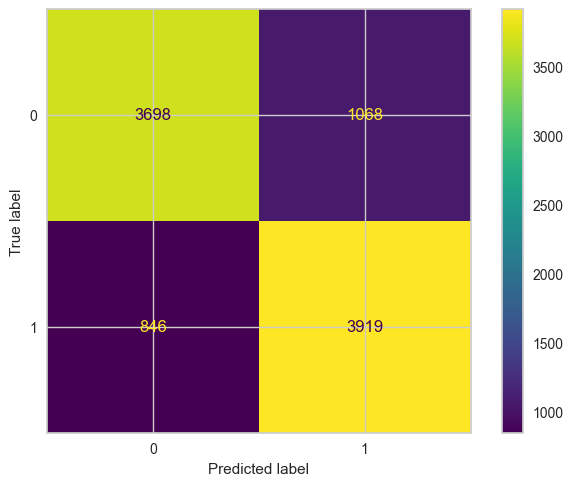

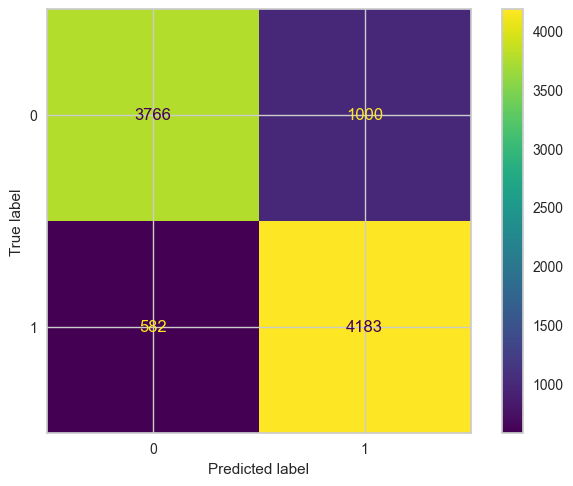

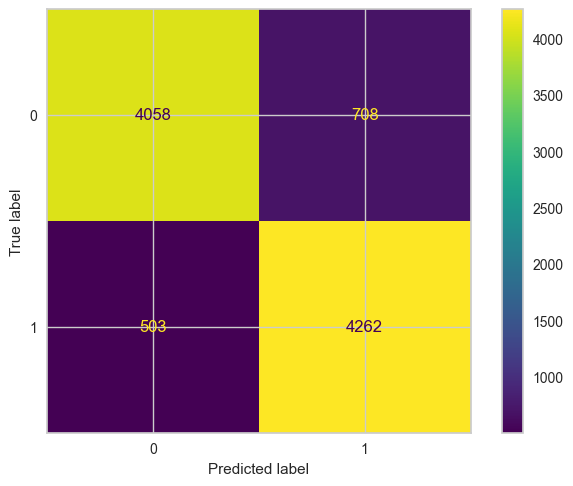

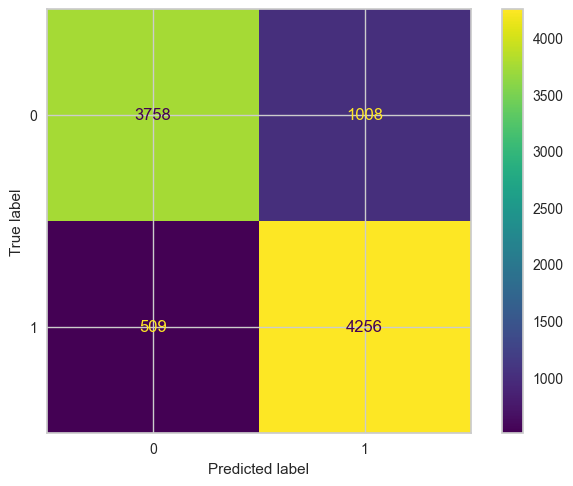

In [65]:
# Logistic Regression
generate_confusion_matrix(sampled_y_test, lr_sm_model['model_pred'])

# Knn
generate_confusion_matrix(sampled_y_test, knn_sm_op_model['model_pred'])

# # Random Forest
generate_confusion_matrix(sampled_y_test, rf_sm_model['model_pred'])

# # Decision Tree
generate_confusion_matrix(sampled_y_test, dt_sm_op_model['model_pred'])

## Result Analysis

### Using SHAP for Global Interpretability of the model (Takes about 1hr to run)

100%|██████████| 9042/9042 [19:26<00:00,  7.75it/s]


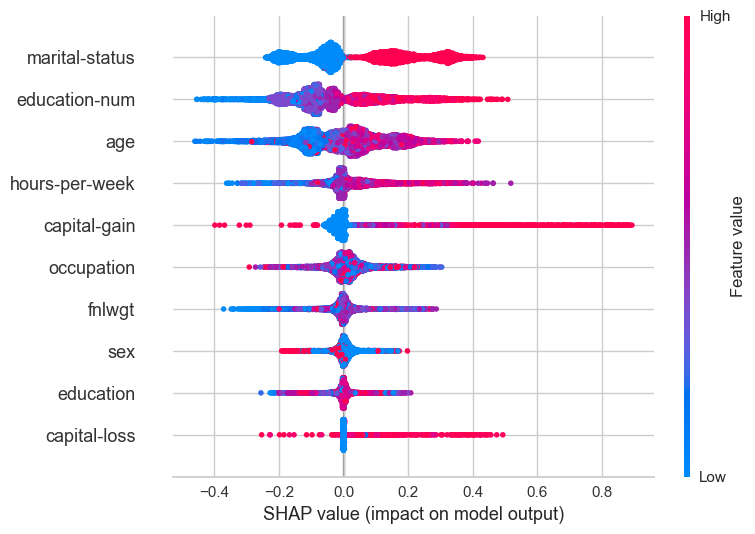

In [66]:
# Fits the explainer
explainer = shap.KernelExplainer(rf_sm_model['model'].predict, X_train[0:10])
# Calculates the SHAP values - It takes some time
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### Using LIME to interpret the best model - Local Interpretability

In [67]:
# It can be used to explain the predictions of any machine learning model by calculating the contribution of each feature to the prediction

explainer =lime.lime_tabular.LimeTabularExplainer(np.array(sampled_X_train),feature_names=sampled_X_train.columns,verbose=True, mode='classification')
explanation = explainer.explain_instance(X_test.iloc[0], rf_sm_model['model'].predict_proba)
explanation.show_in_notebook(show_table=True)
    

Intercept 1.185242603376921
Prediction_local [-0.04605776]
Right: 0.0


### Comparing the performance of the best models for both experiments

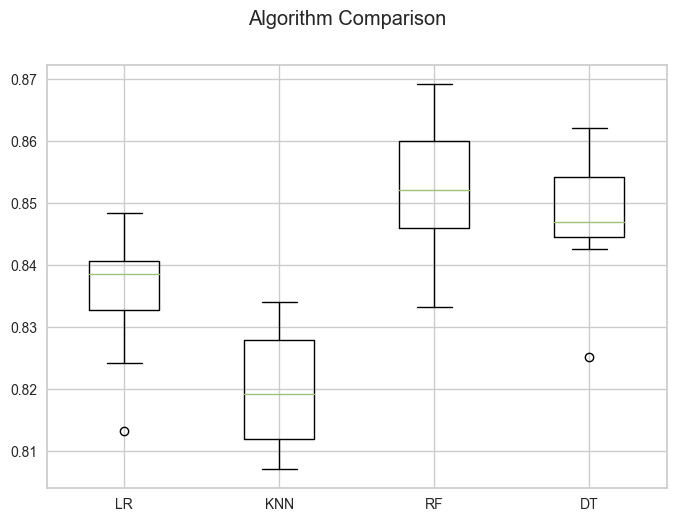

In [68]:
# prepare configuration for cross validation test harness
models = [('LR', lr_op), ('KNN', knn_op), ('RF', rf_op), ('DT', dt_op)]

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model,  X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

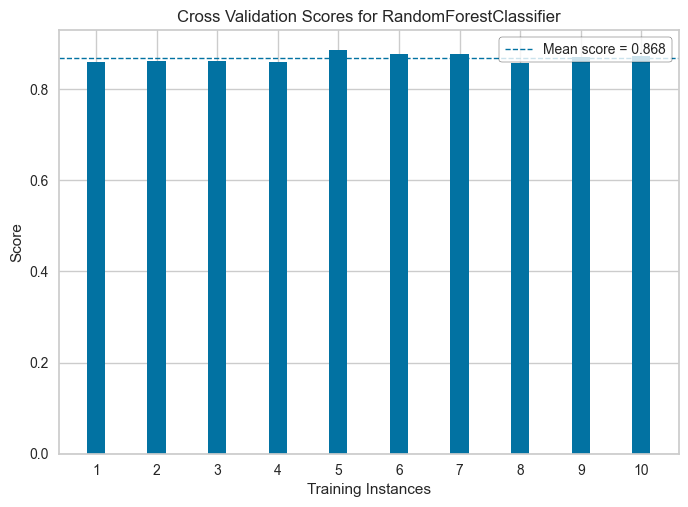

<AxesSubplot: title={'center': 'Cross Validation Scores for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [69]:
# Cross validation score for the best performing model
_, ax = plt.subplots()
cv = StratifiedKFold(10)

oz = CVScores(rf, ax=ax, cv=cv, scoring='accuracy')
oz.fit(sampled_X_train, sampled_y_train)
oz.poof()